In [1]:
# modules we will required

import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
df = pd.read_csv('playstore.csv')
df.head()

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
0,Photo Editor & Candy Camera & Grid & ScrapBook,ART_AND_DESIGN,4.1,159,19000.0,"10,000+",Free,0,Everyone,Art & Design,"January 7, 2018",1.0.0,4.0.3 and up
1,Coloring book moana,ART_AND_DESIGN,3.9,967,14000.0,"500,000+",Free,0,Everyone,Art & Design;Pretend Play,"January 15, 2018",2.0.0,4.0.3 and up
2,"U Launcher Lite – FREE Live Cool Themes, Hide ...",ART_AND_DESIGN,4.7,87510,8700.0,"5,000,000+",Free,0,Everyone,Art & Design,"August 1, 2018",1.2.4,4.0.3 and up
3,Sketch - Draw & Paint,ART_AND_DESIGN,4.5,215644,25000.0,"50,000,000+",Free,0,Teen,Art & Design,"June 8, 2018",Varies with device,4.2 and up
4,Pixel Draw - Number Art Coloring Book,ART_AND_DESIGN,4.3,967,2800.0,"100,000+",Free,0,Everyone,Art & Design;Creativity,"June 20, 2018",1.1,4.4 and up


In [3]:
df.shape

(10841, 13)

### 1. Data clean up – Missing value treatment
#### a. Drop records where rating is missing since rating is our target/study variable

In [4]:
df = df.dropna(subset=['Rating'])
df.shape

(9367, 13)

All the missing records in Rating field are droped.

#### b. Check the null values for the Android Ver column.
i. Are all 3 records having the same problem?

In [5]:
df['Android Ver'].isnull().sum()

3

In [6]:
df[df['Android Ver'].isnull()]

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
4453,[substratum] Vacuum: P,PERSONALIZATION,4.4,230,11000.000000,"1,000+",Paid,$1.49,Everyone,Personalization,"July 20, 2018",4.4,NaN
4490,Pi Dark [substratum],PERSONALIZATION,4.5,189,2100.000000,"10,000+",Free,0,Everyone,Personalization,"March 27, 2018",1.1,NaN
10472,Life Made WI-Fi Touchscreen Photo Frame,1.9,19.0,3.0M,21516.529524,Free,0,Everyone,NaN,"February 11, 2018",1.0.19,4.0 and up,NaN


Yes in third record rating value is greater than 5 which is not valid so need to be droped.

#### ii. Drop the 3rd record i.e. record for “Life Made WIFI …” 

In [7]:
df.drop([10472], inplace =True)

In [18]:
df.shape

(9366, 13)

In [21]:
df[df['Android Ver'].isnull()]
# 3rd record is droped.

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
4453,[substratum] Vacuum: P,PERSONALIZATION,4.4,230,11000.0,"1,000+",Paid,$1.49,Everyone,Personalization,"July 20, 2018",4.4,NaN
4490,Pi Dark [substratum],PERSONALIZATION,4.5,189,2100.0,"10,000+",Free,0,Everyone,Personalization,"March 27, 2018",1.1,NaN


#### iii. Replace remaining missing values with the mode

In [22]:
df['Android Ver'].isnull().sum()

2

In [23]:
df['Android Ver'].fillna(df['Android Ver'].mode()[0] , inplace = True)
df['Android Ver'].isnull().sum()

0

All the missing values are replaced by mode in Android Ver Field.

#### c. Current ver – replace with most common value

In [24]:
df['Current Ver'].isnull().sum()

4

In [25]:
most_commom_value_current_ver = df['Current Ver'].mode()[0]
df['Current Ver'].fillna(most_commom_value_current_ver, inplace = True)
df['Current Ver'].isnull().sum()

0

All missing values in Current ver are replaced by most common value.

### 2. Data clean up – correcting the data types
#### a. Which all variables need to be brought to numeric types?

In [26]:
df.dtypes

App                object
Category           object
Rating            float64
Reviews            object
Size              float64
Installs           object
Type               object
Price              object
Content Rating     object
Genres             object
Last Updated       object
Current Ver        object
Android Ver        object
dtype: object

Reviews, Installs, Size, Price fields need to be brought to numeric types.

#### b. Price variable – remove $ sign and convert to float

In [29]:
df['Price'] =  df['Price'].apply( lambda x : x.replace('$',''))
df['Price'] = df['Price'].astype(float)

In [30]:
df[df['Price']>0].head()

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
234,TurboScan: scan documents and receipts in PDF,BUSINESS,4.7,11442,6800.000000,"100,000+",Paid,4.99,Everyone,Business,"March 25, 2018",1.5.2,4.0 and up
235,Tiny Scanner Pro: PDF Doc Scan,BUSINESS,4.8,10295,39000.000000,"100,000+",Paid,4.99,Everyone,Business,"April 11, 2017",3.4.6,3.0 and up
290,TurboScan: scan documents and receipts in PDF,BUSINESS,4.7,11442,6800.000000,"100,000+",Paid,4.99,Everyone,Business,"March 25, 2018",1.5.2,4.0 and up
291,Tiny Scanner Pro: PDF Doc Scan,BUSINESS,4.8,10295,39000.000000,"100,000+",Paid,4.99,Everyone,Business,"April 11, 2017",3.4.6,3.0 and up
427,Puffin Browser Pro,COMMUNICATION,4.0,18247,21516.529524,"100,000+",Paid,3.99,Everyone,Communication,"July 5, 2018",7.5.3.20547,4.1 and up


In [32]:
df['Price'].dtype

dtype('float64')

Dollar sign has been removed from Price column and data type is float now.

#### c. Installs – remove ‘,’ and ‘+’ sign, convert to integer

In [33]:
df['Installs'] =  df['Installs'].apply( lambda x : x.replace('+',''))
df['Installs'] =  df['Installs'].apply( lambda x : x.replace(',',''))
df['Installs'] = df['Installs'].astype(int)

In [34]:
df['Installs'].sample(5)

6311        500
8943      50000
1426    1000000
2528       1000
5196        100
Name: Installs, dtype: int32

Installs field now dont have any + and , sign and its data type has changed to int.

#### d. Convert all other identified columns to numeric

In [36]:
df.dtypes

App                object
Category           object
Rating            float64
Reviews            object
Size              float64
Installs            int32
Type               object
Price             float64
Content Rating     object
Genres             object
Last Updated       object
Current Ver        object
Android Ver        object
dtype: object

In [37]:
df['Reviews'] = df['Reviews'].astype(int)
df['Size'] = df['Size'].astype(int)

In [38]:
df.dtypes

App                object
Category           object
Rating            float64
Reviews             int32
Size                int32
Installs            int32
Type               object
Price             float64
Content Rating     object
Genres             object
Last Updated       object
Current Ver        object
Android Ver        object
dtype: object

All the numerical columns have converted to thier respective data type.

### 3. Sanity checks – check for the following and handle accordingly
#### a. Avg. rating should be between 1 and 5, as only these values are allowed on the play store. 
#### i. Are there any such records? Drop if so

In [50]:
df[ (df['Rating']<1) | ( df['Rating']>5 )]

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver


No such record exist.

#### b. Reviews should not be more than installs as only those who installed can review the app.
#### i. Are there any such records? Drop if so.

In [54]:
df[df['Reviews'] > df['Installs']]

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
2454,KBA-EZ Health Guide,MEDICAL,5.0,4,25000,1,Free,0.00,Everyone,Medical,"August 2, 2018",1.0.72,4.0.3 and up
4663,Alarmy (Sleep If U Can) - Pro,LIFESTYLE,4.8,10249,21516,10000,Paid,2.49,Everyone,Lifestyle,"July 30, 2018",Varies with device,Varies with device
5917,Ra Ga Ba,GAME,5.0,2,20000,1,Paid,1.49,Everyone,Arcade,"February 8, 2017",1.0.4,2.3 and up
6700,Brick Breaker BR,GAME,5.0,7,19000,5,Free,0.00,Everyone,Arcade,"July 23, 2018",1.0,4.1 and up
7402,Trovami se ci riesci,GAME,5.0,11,6100,10,Free,0.00,Everyone,Arcade,"March 11, 2017",0.1,2.3 and up
8591,DN Blog,SOCIAL,5.0,20,4200,10,Free,0.00,Teen,Social,"July 23, 2018",1.0,4.0 and up
10697,Mu.F.O.,GAME,5.0,2,16000,1,Paid,0.99,Everyone,Arcade,"March 3, 2017",1.0,2.3 and up


Yes we have 7 such rows. Let's drop them

In [55]:
df.drop(df[df['Reviews'] > df['Installs']].index , axis=0, inplace =True)

In [56]:
df[df['Reviews'] > df['Installs']]

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver


All those invalid rows gets droped

In [57]:
df.shape

(9359, 13)

In [58]:
df.to_csv('EDA1.csv',index=False)

In [2]:
df = pd.read_csv('EDA1.csv')
df.head()

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
0,Photo Editor & Candy Camera & Grid & ScrapBook,ART_AND_DESIGN,4.1,159,19000,10000,Free,0.0,Everyone,Art & Design,"January 7, 2018",1.0.0,4.0.3 and up
1,Coloring book moana,ART_AND_DESIGN,3.9,967,14000,500000,Free,0.0,Everyone,Art & Design;Pretend Play,"January 15, 2018",2.0.0,4.0.3 and up
2,"U Launcher Lite – FREE Live Cool Themes, Hide ...",ART_AND_DESIGN,4.7,87510,8700,5000000,Free,0.0,Everyone,Art & Design,"August 1, 2018",1.2.4,4.0.3 and up
3,Sketch - Draw & Paint,ART_AND_DESIGN,4.5,215644,25000,50000000,Free,0.0,Teen,Art & Design,"June 8, 2018",Varies with device,4.2 and up
4,Pixel Draw - Number Art Coloring Book,ART_AND_DESIGN,4.3,967,2800,100000,Free,0.0,Everyone,Art & Design;Creativity,"June 20, 2018",1.1,4.4 and up


### 4. Identify and handle outliers –
#### a. Price column
#### i. Make suitable plot to identify outliers in price

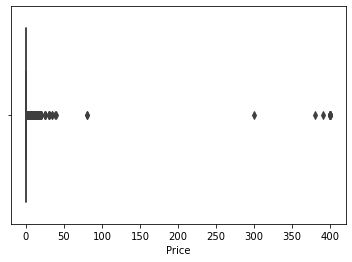

In [5]:
sns.boxplot(df['Price']);

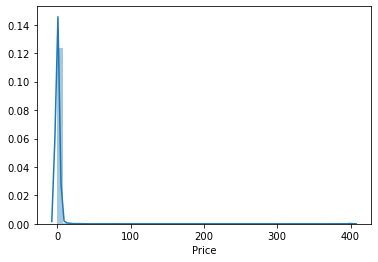

In [7]:
sns.distplot(df['Price'])

As we can observe from visualization Price field is having so many outliers.

#### ii. Do you expect apps on the play store to cost $200? Check out these cases

I don't expect the apps on the play store to cost greater than or equal to 200 dollar.Let's check this condition, If this condition satisifies then its is  surely a error value which has occured in our dataset.

In [8]:
df[df['Price']>200]

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
4037,most expensive app (H),FAMILY,4.3,6,1500,100,Paid,399.99,Everyone,Entertainment,"July 16, 2018",1.0,7.0 and up
4190,💎 I'm rich,LIFESTYLE,3.8,718,26000,10000,Paid,399.99,Everyone,Lifestyle,"March 11, 2018",1.0.0,4.4 and up
4195,I'm Rich - Trump Edition,LIFESTYLE,3.6,275,7300,10000,Paid,400.00,Everyone,Lifestyle,"May 3, 2018",1.0.1,4.1 and up
5044,I am rich,LIFESTYLE,3.8,3547,1800,100000,Paid,399.99,Everyone,Lifestyle,"January 12, 2018",2.0,4.0.3 and up
5047,I am Rich Plus,FAMILY,4.0,856,8700,10000,Paid,399.99,Everyone,Entertainment,"May 19, 2018",3.0,4.4 and up
5048,I am rich VIP,LIFESTYLE,3.8,411,2600,10000,Paid,299.99,Everyone,Lifestyle,"July 21, 2018",1.1.1,4.3 and up
5049,I Am Rich Premium,FINANCE,4.1,1867,4700,50000,Paid,399.99,Everyone,Finance,"November 12, 2017",1.6,4.0 and up
5050,I am extremely Rich,LIFESTYLE,2.9,41,2900,1000,Paid,379.99,Everyone,Lifestyle,"July 1, 2018",1.0,4.0 and up
5051,I am Rich!,FINANCE,3.8,93,22000,1000,Paid,399.99,Everyone,Finance,"December 11, 2017",1.0,4.1 and up
5052,I am rich(premium),FINANCE,3.5,472,965,5000,Paid,399.99,Everyone,Finance,"May 1, 2017",3.4,4.4 and up


Yes, there are some cases in which Price is greater than 200 i.e. Its's not a valid entry so will drop all these rows.

In [9]:
df.drop(df[df['Price']>200].index, axis=0, inplace = True)

In [10]:
df[df['Price']>200]

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver


All those cases are dropped.

#### iii. After dropping the useless records, make the suitable plot again to identify outliers

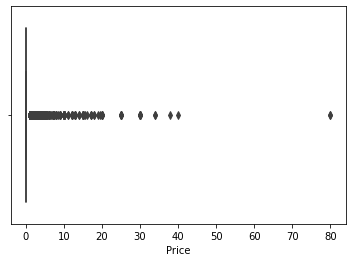

In [17]:
sns.boxplot(df['Price']);

Price field is distributed mostly in the range of 0 to 40. So let's drop the rows having Price value greater tha 40.

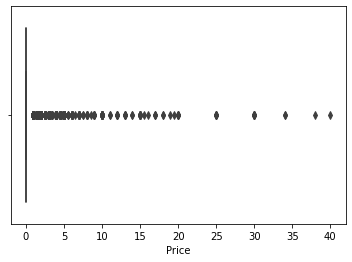

In [20]:
df.drop( df[df['Price']>40].index, axis = 0, inplace = True)
sns.boxplot(df.Price);

Outliers are handled now.

#### iv. Limit data to records with price < $30

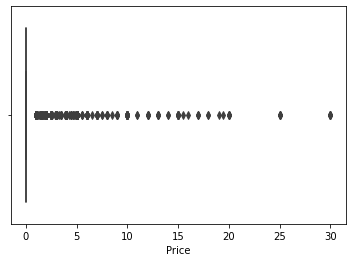

In [22]:
df.drop( df[df['Price']>30].index, axis = 0, inplace = True)
sns.boxplot(df.Price);

Price field is ranging between 0 to 30 now.

### b. Reviews column
#### i. Make suitable plot

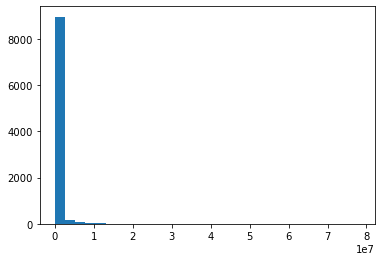

In [35]:
plt.hist(df['Reviews'], bins=30);

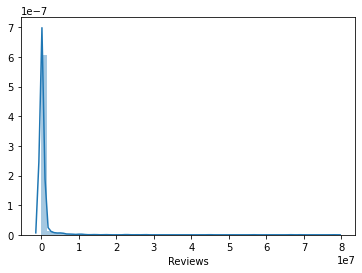

In [33]:
sns.distplot(df['Reviews']);

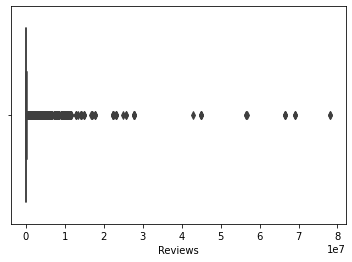

In [34]:
sns.boxplot(df['Reviews']);

We can observe from the plots that Reviews are generally from 0 to 3 and there are some edge cases where Reviews for an app is greater than 3.

#### ii. Limit data to apps with < 1 Million reviews

In [39]:
df[df['Reviews']>=1000000]

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
132,Wattpad 📖 Free Books,BOOKS_AND_REFERENCE,4.6,2914724,21516,100000000,Free,0.0,Teen,Books & Reference,"August 1, 2018",Varies with device,Varies with device
145,Google Play Books,BOOKS_AND_REFERENCE,3.9,1433233,21516,1000000000,Free,0.0,Teen,Books & Reference,"August 3, 2018",Varies with device,Varies with device
179,Uber Driver,BUSINESS,4.4,1254730,21516,10000000,Free,0.0,Everyone,Business,"August 3, 2018",Varies with device,Varies with device
184,OfficeSuite : Free Office + PDF Editor,BUSINESS,4.3,1002861,35000,100000000,Free,0.0,Everyone,Business,"August 2, 2018",9.7.14188,4.1 and up
191,Facebook Pages Manager,BUSINESS,4.0,1279184,21516,50000000,Free,0.0,Everyone,Business,"August 2, 2018",Varies with device,Varies with device
...,...,...,...,...,...,...,...,...,...,...,...,...,...
8886,Fallout Shelter,FAMILY,4.6,2721923,25000,10000000,Free,0.0,Teen,Simulation,"June 11, 2018",1.13.12,4.1 and up
8896,Facebook Pages Manager,BUSINESS,4.0,1279800,21516,50000000,Free,0.0,Everyone,Business,"August 6, 2018",Varies with device,Varies with device
9015,Garena Free Fire,GAME,4.5,5534114,53000,100000000,Free,0.0,Teen,Action,"August 3, 2018",1.21.0,4.0.3 and up
9220,FRONTLINE COMMANDO,GAME,4.4,1351833,12000,10000000,Free,0.0,Teen,Action,"October 28, 2013",3.0.3,2.1 and up


We have 704 such rows, let's drop them.

In [40]:
df.drop(df[df['Reviews']>=1000000].index, axis=0, inplace=True)
df[df['Reviews']>=1000000]

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver


All those cases are handled now.

### c. Installs
#### i. What is the 95th percentile of the installs?

In [46]:
percentile_95 = np.percentile(df['Installs'],95)
print('95th percentile of the installs is',percentile_95)

95th percentile of the installs is 10000000.0


#### ii. Drop records having a value more than the 95th percentile

In [50]:
df.drop(df[ df['Installs']>percentile_95 ].index, axis=0, inplace = True )

In [51]:
df[df['Installs']>percentile_95]

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver


All those records having Installs value greater than 95th percentile are dropped.

## Data analysis to answer business questions
### 5. What is the distribution of ratings like? (use Seaborn) More skewed towards higher/lower values?
#### a. How do you explain this?

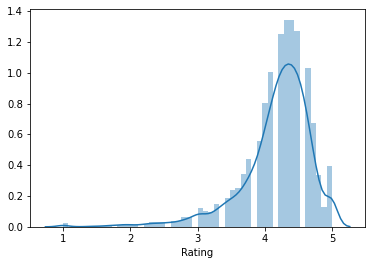

In [57]:
sns.distplot(df.Rating);

Rating field is following a Lognormal distribution which means its a skewed data. Rating field is Left-skewed. Left-skewed distributions are also called negatively-skewed distributions. That's because there is a long tail in the negative direction on the number line. The mean is also to the left of the peak i.e mean < mode.

#### b. What is the implication of this on your analysis?

I can infer from this distribution that we have less number of apps that has rating less than 3 and major chunk of apps have rating between 3 to 5. Rating is our target variable which tells us how the app is performing so major apps are performing good and we can recommend apps which has high ratings values to our customers.

### 6. What are the top Content Rating values?
#### a. Are there any values with very few records?

In [59]:
df.groupby('Content Rating')['Content Rating'].count().sort_values(ascending=False)

Content Rating
Everyone           6782
Teen                900
Mature 17+          417
Everyone 10+        332
Adults only 18+       3
Unrated               1
Name: Content Rating, dtype: int64

Yes, Adults only 18+ has very few records i.e. 3 and we have 1 unrated value. 

### b. If yes, drop those as they won’t help in the analysis

In [65]:
df[(df['Content Rating']=='Adults only 18+') | (df['Content Rating']=='Unrated')]

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
287,Manga Master - Best manga & comic reader,COMICS,4.6,24005,4900,500000,Free,0.0,Adults only 18+,Comics,"July 4, 2018",1.1.7.0,4.1 and up
2903,DraftKings - Daily Fantasy Sports,SPORTS,4.5,50017,41000,1000000,Free,0.0,Adults only 18+,Sports,"July 24, 2018",3.21.324,4.4 and up
5945,Manga Books,COMICS,3.8,7326,21516,500000,Free,0.0,Adults only 18+,Comics,"August 3, 2018",Varies with device,Varies with device
7336,DC Universe Online Map,TOOLS,4.1,1186,6400,50000,Free,0.0,Unrated,Tools,"February 27, 2012",1.3,2.3.3 and up


In [67]:
least_frequent_content = df[(df['Content Rating']=='Adults only 18+') | (df['Content Rating']=='Unrated')].index

In [69]:
df.drop(least_frequent_content, axis=0, inplace = True)

df[(df['Content Rating']=='Adults only 18+') | (df['Content Rating']=='Unrated')]

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver


I have dropped all those useless records.

### 7. Effect of size on rating
#### a. Make a joinplot to understand the effect of size on rating

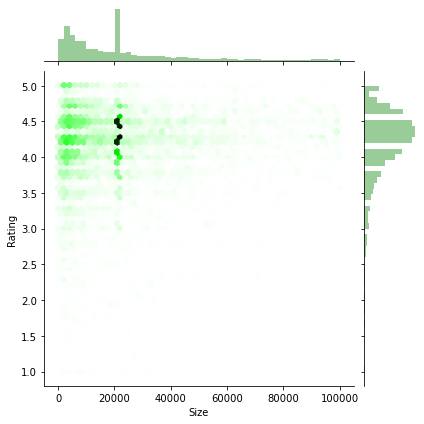

In [34]:
sns.jointplot(x='Size', y='Rating', data=df, kind='hex',color='g');

In [76]:
df[['Size','Rating']].corr()

,Size,Rating
Size,1.000000,0.058076
Rating,0.058076,1.000000


### b. Do you see any patterns?

I haven't observed any dominating pattern which can tell us the relation between two fields. 
Correlation between Size and Rating is approx zero which shows no correlation.

### c. How do you explain the pattern?

I observed something that an app will have more chances of high rating if its size is near 20000.

In [78]:
df.to_csv('EDA2.csv',index=False)

In [2]:
df = pd.read_csv('EDA2.csv')
df.head()

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
0,Photo Editor & Candy Camera & Grid & ScrapBook,ART_AND_DESIGN,4.1,159,19000,10000,Free,0.0,Everyone,Art & Design,"January 7, 2018",1.0.0,4.0.3 and up
1,Coloring book moana,ART_AND_DESIGN,3.9,967,14000,500000,Free,0.0,Everyone,Art & Design;Pretend Play,"January 15, 2018",2.0.0,4.0.3 and up
2,"U Launcher Lite – FREE Live Cool Themes, Hide ...",ART_AND_DESIGN,4.7,87510,8700,5000000,Free,0.0,Everyone,Art & Design,"August 1, 2018",1.2.4,4.0.3 and up
3,Pixel Draw - Number Art Coloring Book,ART_AND_DESIGN,4.3,967,2800,100000,Free,0.0,Everyone,Art & Design;Creativity,"June 20, 2018",1.1,4.4 and up
4,Paper flowers instructions,ART_AND_DESIGN,4.4,167,5600,50000,Free,0.0,Everyone,Art & Design,"March 26, 2017",1.0,2.3 and up


In [3]:
df.shape

(8431, 13)

### 8. Effect of price on rating
#### a. Make a jointplot (with regression line)

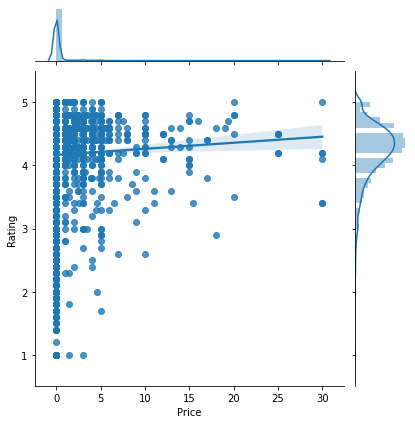

In [31]:
sns.jointplot(x='Price', y='Rating', data=df, kind='reg');

#### b. What pattern do you see?

Rating and Price have a scattered behaviour , there's not any dominant pattern but we can observe that both are positively correlated .Rating is almost constant w.r.t Price.

#### c. How do you explain the pattern?

We can observe that there are more free apps on playstore and some are also paid but free apps tends to have high rating as compared to the paid ones.

#### d. Replot the data, this time with only records with price > 0

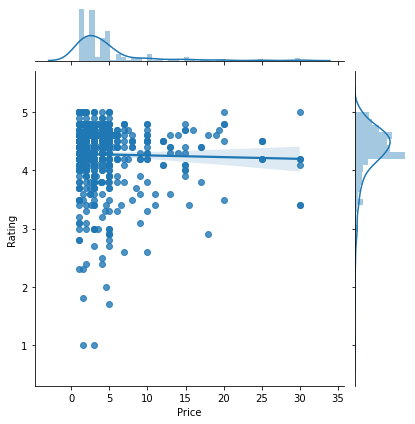

In [33]:
sns.jointplot(x='Price', y='Rating', data=df[df['Price']>0], kind='reg');

#### e. Does the pattern change?

Yes, pattern got affected . Now there's a slight negative correlation between Rating and Price.

#### f. What is your overall inference on the effect of price on the rating

I can infer that there's not a strong correlation between Price and Rating. For High Price apps Rating is mostly greater than 3.

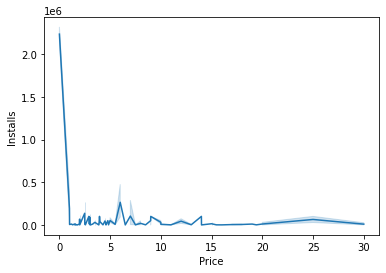

In [14]:
sns.lineplot(x='Price', y='Installs', data=df);

We can also see that as the Price is increasing Installs are decreasing which clearly shows that user are interested in free apps

### 9. Look at all the numeric interactions together –
#### a. Make a pairplort with the colulmns - 'Reviews', 'Size', 'Rating', 'Price'

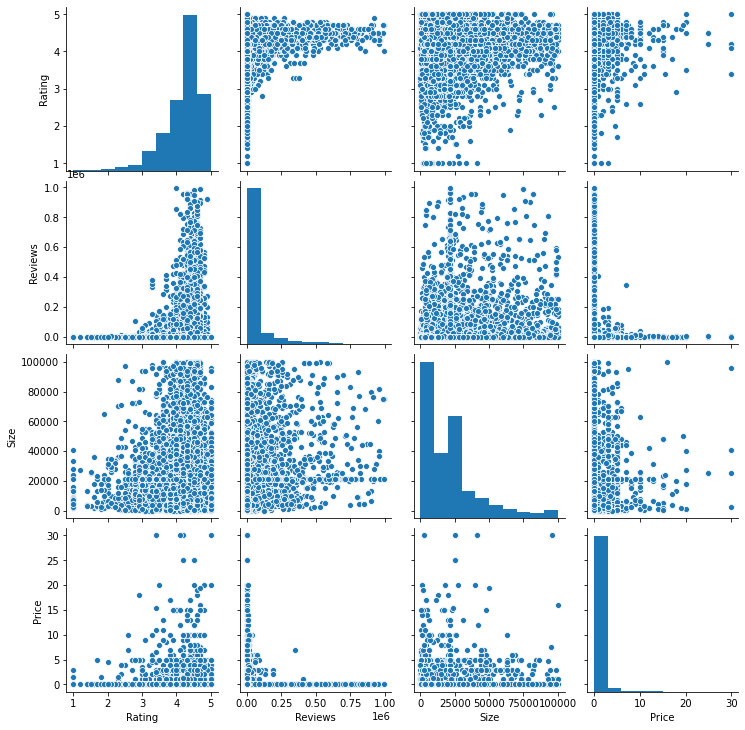

In [3]:
sns.pairplot(df, vars=['Rating','Reviews','Size','Price']);

### 10. Rating vs. content rating
#### a. Make a bar plot displaying the rating for each content rating

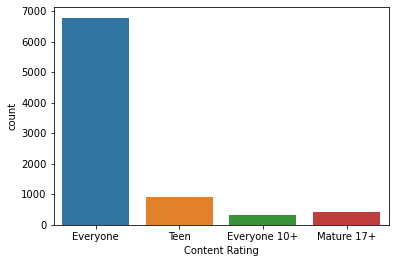

In [30]:
sns.countplot(x='Content Rating', data=df);

#### b. Which metric would you use? Mean? Median? Some other quantile?

I would use Median because Median is more robust to outliers.

#### c. Choose the right metric and plot

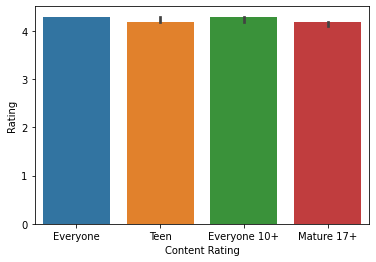

In [29]:
sns.barplot(x='Content Rating', y='Rating', data=df, estimator=np.median);

### 11. Content rating vs. size vs. rating – 3 variables at a time
#### a. Create 5 buckets (20% records in each) based on Size

In [3]:
df = pd.read_csv('EDA2.csv')
df.head()

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
0,Photo Editor & Candy Camera & Grid & ScrapBook,ART_AND_DESIGN,4.1,159,19000,10000,Free,0.0,Everyone,Art & Design,"January 7, 2018",1.0.0,4.0.3 and up
1,Coloring book moana,ART_AND_DESIGN,3.9,967,14000,500000,Free,0.0,Everyone,Art & Design;Pretend Play,"January 15, 2018",2.0.0,4.0.3 and up
2,"U Launcher Lite – FREE Live Cool Themes, Hide ...",ART_AND_DESIGN,4.7,87510,8700,5000000,Free,0.0,Everyone,Art & Design,"August 1, 2018",1.2.4,4.0.3 and up
3,Pixel Draw - Number Art Coloring Book,ART_AND_DESIGN,4.3,967,2800,100000,Free,0.0,Everyone,Art & Design;Creativity,"June 20, 2018",1.1,4.4 and up
4,Paper flowers instructions,ART_AND_DESIGN,4.4,167,5600,50000,Free,0.0,Everyone,Art & Design,"March 26, 2017",1.0,2.3 and up


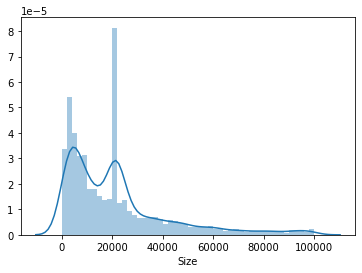

In [4]:
sns.distplot(df['Size']);

In [5]:
# values are ranging from 0 to 100000
bins=[0, 20000, 40000, 60000, 80000, 100000]

In [6]:
df['Size_Bins'] = pd.cut(df['Size'], bins, labels=['0-20KB','20k-40KB','40k-60KB','60k-80KB','80k-100KB'])
df.head()

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver,Size_Bins
0,Photo Editor & Candy Camera & Grid & ScrapBook,ART_AND_DESIGN,4.1,159,19000,10000,Free,0.0,Everyone,Art & Design,"January 7, 2018",1.0.0,4.0.3 and up,0-20KB
1,Coloring book moana,ART_AND_DESIGN,3.9,967,14000,500000,Free,0.0,Everyone,Art & Design;Pretend Play,"January 15, 2018",2.0.0,4.0.3 and up,0-20KB
2,"U Launcher Lite – FREE Live Cool Themes, Hide ...",ART_AND_DESIGN,4.7,87510,8700,5000000,Free,0.0,Everyone,Art & Design,"August 1, 2018",1.2.4,4.0.3 and up,0-20KB
3,Pixel Draw - Number Art Coloring Book,ART_AND_DESIGN,4.3,967,2800,100000,Free,0.0,Everyone,Art & Design;Creativity,"June 20, 2018",1.1,4.4 and up,0-20KB
4,Paper flowers instructions,ART_AND_DESIGN,4.4,167,5600,50000,Free,0.0,Everyone,Art & Design,"March 26, 2017",1.0,2.3 and up,0-20KB


In [14]:
df.groupby(['Content Rating','Size_Bins'])['Rating'].mean().unstack()

Size_Bins,0-20KB,20k-40KB,40k-60KB,60k-80KB,80k-100KB
Content Rating,,,,,
Everyone,4.145730,4.200195,4.167083,4.245408,4.260127
Everyone 10+,4.247561,4.169811,4.263636,4.280769,4.304762
Mature 17+,4.010582,4.156291,4.190476,4.200000,4.252632
Teen,4.182240,4.170432,4.237383,4.274194,4.270313


#### b. By Content Rating vs. Size buckets, get the rating (20th percentile) for each combination

In [17]:
result = pd.pivot_table(df, values='Rating', index='Size_Bins', columns='Content Rating', aggfunc=lambda x:x.quantile(0.2) )
result 

Content Rating,Everyone,Everyone 10+,Mature 17+,Teen
Size_Bins,,,,
0-20KB,3.80,4.02,3.5,3.9
20k-40KB,4.00,4.00,4.0,3.9
40k-60KB,3.90,4.06,4.1,4.0
60k-80KB,4.00,4.00,4.0,4.0
80k-100KB,4.04,4.10,4.0,4.0


#### c. Make a heatmap of this
##### 1. Annotated

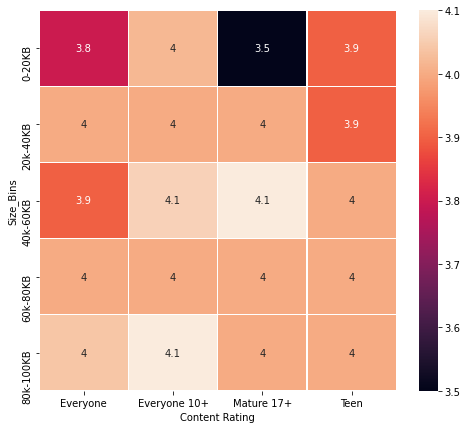

In [23]:
plt.figure(figsize=(8,7))
sns.heatmap(result, annot=True ,linewidths=0.3);

#### ii. Greens color map

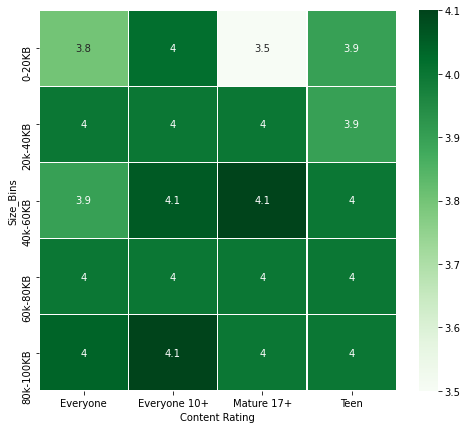

In [24]:
plt.figure(figsize=(8,7))
sns.heatmap(result, annot=True, linewidths=.3, cmap='Greens');

#### d. What’s your inference? Are lighter apps preferred in all categories? Heavier? Some?

Based on analysis, its not true that lighter apps are preferred in all categories. Because apps with size 40k-60k and 80k-100k have got the highest rating in all categories. So, in general we can say that heavier apps are preferred in all categories.